# 联通客户流失预测探索性分析

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('data/Customer.csv')
data

,ID,套餐金额,额外通话时长,额外流量,改变行为,服务合约,关联购买,集团用户,流失用户
0,1,1,792.833333,-10.450067,0,0,0,0,0
1,2,1,121.666667,-21.141117,0,0,0,0,0
2,3,1,-30.000000,-25.655273,0,0,0,0,1
3,4,1,241.500000,-288.341254,0,1,0,1,0
4,5,1,1629.666667,-23.655505,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4970,4971,1,1109.333333,49.843215,0,1,0,1,0
4971,4972,1,197.833333,-34.987142,0,1,0,0,1
4972,4973,1,162.833333,71.369162,0,1,0,0,0
4973,4974,1,358.166667,26.315733,0,1,0,0,1


In [9]:
# 完整性分析
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4975 non-null   int64  
 1   套餐金额    4975 non-null   int64  
 2   额外通话时长  4975 non-null   float64
 3   额外流量    4975 non-null   float64
 4   改变行为    4975 non-null   int64  
 5   服务合约    4975 non-null   int64  
 6   关联购买    4975 non-null   int64  
 7   集团用户    4975 non-null   int64  
 8   流失用户    4975 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 349.9 KB


In [10]:
data.describe()

,ID,套餐金额,额外通话时长,额外流量,改变行为,服务合约,关联购买,集团用户,流失用户
count,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,2488.000000,1.057688,258.520030,-71.580403,0.021307,0.245226,0.047437,0.227337,0.782714
std,1436.303125,0.258527,723.057190,275.557448,0.144419,0.430264,0.278143,0.419154,0.412441
min,1.000000,1.000000,-2828.333333,-2189.875986,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1244.500000,1.000000,-126.666667,-74.289824,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2488.000000,1.000000,13.500000,-59.652734,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3731.500000,1.000000,338.658333,-25.795045,0.000000,0.000000,0.000000,0.000000,1.000000
max,4975.000000,3.000000,4314.000000,2568.704293,1.000000,1.000000,2.000000,1.000000,1.000000


正数代表有超出,负数代表有剩余
从四分位数可以看出有超过一半的用户有额外通话时长，流量只有小部分的用户超出

In [11]:
data.columns

Index(['ID', '套餐金额', '额外通话时长', '额外流量', '改变行为', '服务合约', '关联购买', '集团用户', '流失用户'], dtype='object')

In [12]:
# 修改列名称
data.columns = ['id','pack_type','extra_time','extra_flow','pack_change','contract','asso_pur','group_user','loss']
data.columns

Index(['id', 'pack_type', 'extra_time', 'extra_flow', 'pack_change',
       'contract', 'asso_pur', 'group_user', 'loss'],
      dtype='object')

## 一：数据的描述性统计分析

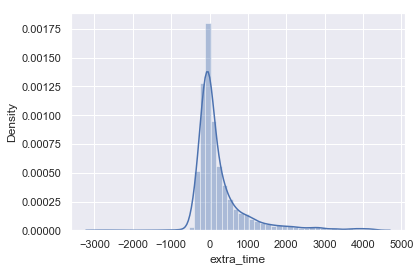

In [19]:
# 连续型数据
sns.distplot(data['extra_time'])

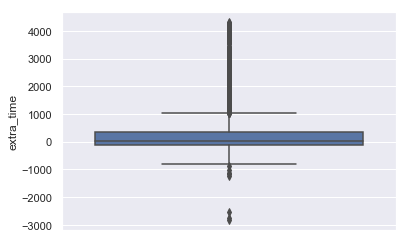

In [20]:
sns.boxplot(y=data['extra_time'])

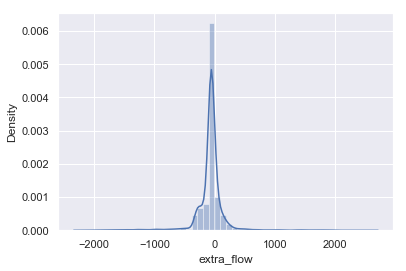

In [21]:
sns.distplot(data['extra_flow'])

In [24]:
data.columns

Index(['id', 'pack_type', 'extra_time', 'extra_flow', 'pack_change',
       'contract', 'asso_pur', 'group_user', 'loss'],
      dtype='object')

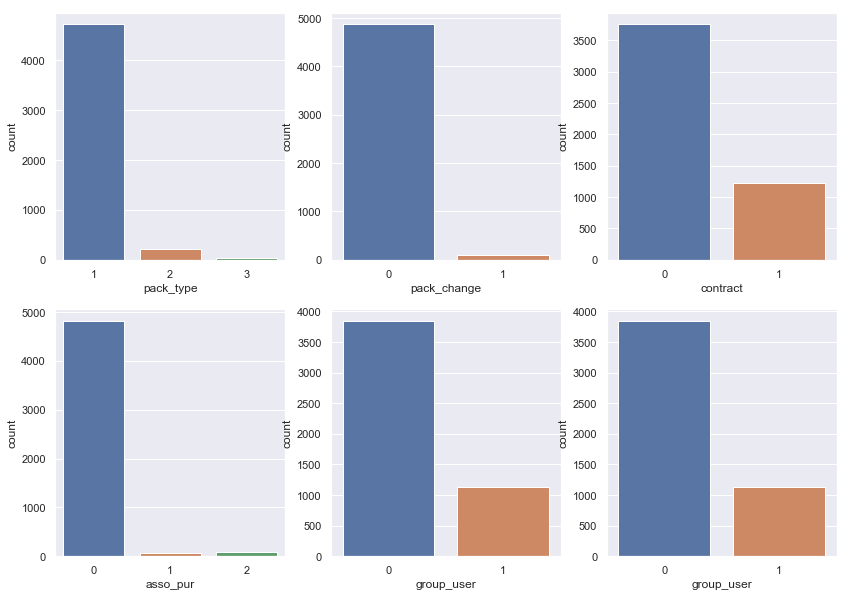

In [27]:
# 类别型数据
# fig=plt.figure(figsize=(10,6))
# ax1=fig.add_subplot(2,3,1)
# ax2=fig.add_subplot(2,3,2)
# x x x
# x x x
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(14,10))
sns.countplot(x='pack_type',data=data,ax=axes[0,0])
sns.countplot(x='pack_change',data=data,ax=axes[0,1])
sns.countplot(x='contract',data=data,ax=axes[0,2])
sns.countplot(x='asso_pur',data=data,ax=axes[1,0])
sns.countplot(x='group_user',data=data,ax=axes[1,1])
sns.countplot(x='group_user',data=data,ax=axes[1,2])

## 二：探索性分析

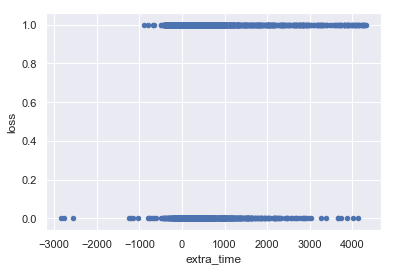

In [29]:
# 连续型
data.plot(x='extra_time',y='loss',kind='scatter')

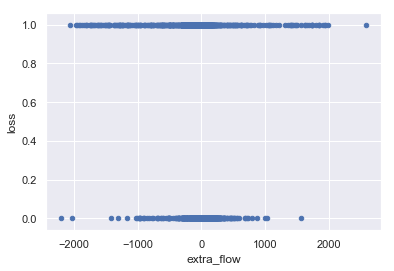

In [30]:
data.plot(x='extra_flow',y='loss',kind='scatter')

In [31]:
data['extra_time'].describe()

count    4975.000000
mean      258.520030
std       723.057190
min     -2828.333333
25%      -126.666667
50%        13.500000
75%       338.658333
max      4314.000000
Name: extra_time, dtype: float64

In [32]:
# 额外通话时间
bin1=[-3000,-2000,-500,0,500,1000,2000,3000,5000]
data['time_label']=pd.cut(data.extra_time,bins=bin1)

In [33]:
data.head()

,id,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,loss,time_label
0,1,1,792.833333,-10.450067,0,0,0,0,0,"(500, 1000]"
1,2,1,121.666667,-21.141117,0,0,0,0,0,"(0, 500]"
2,3,1,-30.000000,-25.655273,0,0,0,0,1,"(-500, 0]"
3,4,1,241.500000,-288.341254,0,1,0,1,0,"(0, 500]"
4,5,1,1629.666667,-23.655505,0,0,0,1,0,"(1000, 2000]"


In [34]:
data['extra_flow'].describe()

count    4975.000000
mean      -71.580403
std       275.557448
min     -2189.875986
25%       -74.289824
50%       -59.652734
75%       -25.795045
max      2568.704293
Name: extra_flow, dtype: float64

In [35]:
# 额外流量
bin1=[-2500,-2000,-1000,-500,0,500,1000,2500]
data['flow_label']=pd.cut(data.extra_flow,bins=bin1)

In [36]:
data.head()

,id,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,loss,time_label,flow_label
0,1,1,792.833333,-10.450067,0,0,0,0,0,"(500, 1000]","(-500, 0]"
1,2,1,121.666667,-21.141117,0,0,0,0,0,"(0, 500]","(-500, 0]"
2,3,1,-30.000000,-25.655273,0,0,0,0,1,"(-500, 0]","(-500, 0]"
3,4,1,241.500000,-288.341254,0,1,0,1,0,"(0, 500]","(-500, 0]"
4,5,1,1629.666667,-23.655505,0,0,0,1,0,"(1000, 2000]","(-500, 0]"


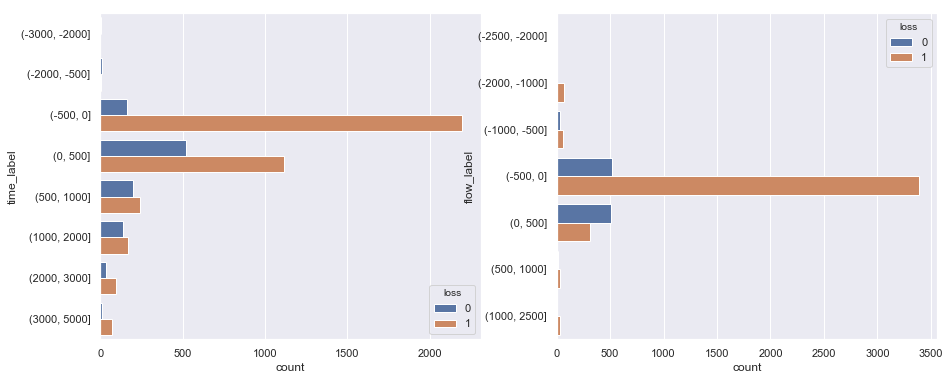

In [38]:
fig2,axes2=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.countplot(y='time_label',hue='loss'
              ,data=data,ax=axes2[0])
sns.countplot(y='flow_label',hue='loss'
              ,data=data,ax=axes2[1])

可以明显看出，用户使用的额外通话时间和流量越多，流失概率降低，这些超额使用的用户在用户分类中属于高价值用户，用户粘性很高，运营商应该吧重点放在这些客户身上

In [39]:
data.columns

Index(['id', 'pack_type', 'extra_time', 'extra_flow', 'pack_change',
       'contract', 'asso_pur', 'group_user', 'loss', 'time_label',
       'flow_label'],
      dtype='object')

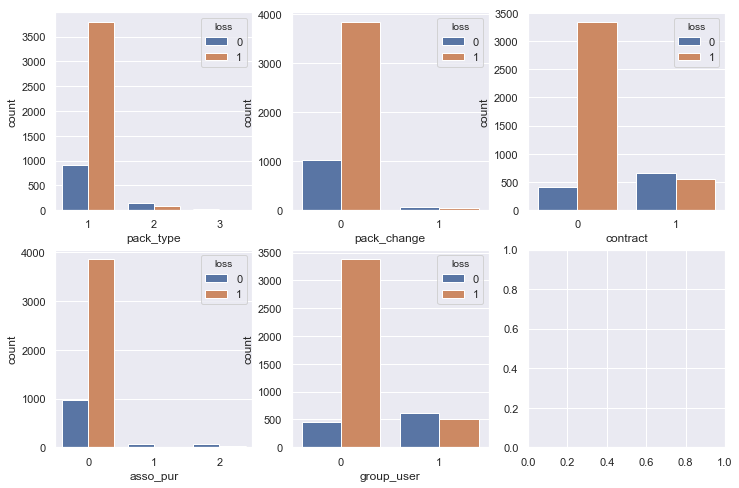

In [41]:
fig3,axes3=plt.subplots(nrows=2,ncols=3,figsize=(12,8))
sns.countplot(x='pack_type',hue='loss'
              ,data=data,ax=axes3[0,0])
sns.countplot(x='pack_change',hue='loss'
              ,data=data,ax=axes3[0,1])
sns.countplot(x='contract',hue='loss'
              ,data=data,ax=axes3[0,2])
sns.countplot(x='asso_pur',hue='loss'
              ,data=data,ax=axes3[1,0])
sns.countplot(x='group_user',hue='loss'
              ,data=data,ax=axes3[1,1])

初步得出以下结论：1）套餐金额越大，用户越不易流失，套餐金额大的用户忠诚度也高2）改过套餐的用户流失的概率变小3）签订过合约的流失比例较小，签订合约也意味着一段时间内（比如2年，3年）用户一般都不会更换运营商号码，可以说签订合约的用户比较稳定4）办理过其它套餐业务的用户因样本量太少，后续再研究5）集团用户的流失率相比个人用户低很多


In [42]:
data.columns

Index(['id', 'pack_type', 'extra_time', 'extra_flow', 'pack_change',
       'contract', 'asso_pur', 'group_user', 'loss', 'time_label',
       'flow_label'],
      dtype='object')

In [43]:
# 相关性分析
list1=['pack_type', 'extra_time', 'extra_flow', 'pack_change',
       'contract', 'asso_pur', 'group_user', 'loss']
corrmat=data[list1].corr(method='pearson')
corrmat

,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,loss
pack_type,1.000000,0.056750,-0.123967,0.020920,0.219815,0.001078,0.179509,-0.235007
extra_time,0.056750,1.000000,0.069081,0.048942,0.205315,-0.012520,0.130014,-0.166809
extra_flow,-0.123967,0.069081,1.000000,0.009325,0.058910,0.023158,0.050382,-0.115900
pack_change,0.020920,0.048942,0.009325,1.000000,0.097083,0.009868,0.056136,-0.114650
contract,0.219815,0.205315,0.058910,0.097083,1.000000,0.011972,0.344073,-0.454198
asso_pur,0.001078,-0.012520,0.023158,0.009868,0.011972,1.000000,0.102344,-0.227339
group_user,0.179509,0.130014,0.050382,0.056136,0.344073,0.102344,1.000000,-0.437557
loss,-0.235007,-0.166809,-0.115900,-0.114650,-0.454198,-0.227339,-0.437557,1.000000


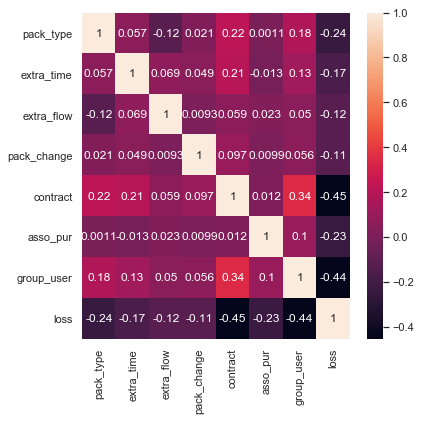

In [46]:
plt.figure(figsize=(6,6))
sns.heatmap(corrmat,annot=True,square=False)

In [47]:
# 数据预处理
# 额外通话时长
data['time_tranf']=data.apply(lambda x:1 if x.extra_time>0 else 0,axis=1)
data['flow_tranf']=data.apply(lambda x:1 if x.extra_flow>0 else 0,axis=1)

In [48]:
data.head()

,id,pack_type,extra_time,extra_flow,pack_change,contract,asso_pur,group_user,loss,time_label,flow_label,time_tranf,flow_tranf
0,1,1,792.833333,-10.450067,0,0,0,0,0,"(500, 1000]","(-500, 0]",1,0
1,2,1,121.666667,-21.141117,0,0,0,0,0,"(0, 500]","(-500, 0]",1,0
2,3,1,-30.000000,-25.655273,0,0,0,0,1,"(-500, 0]","(-500, 0]",0,0
3,4,1,241.500000,-288.341254,0,1,0,1,0,"(0, 500]","(-500, 0]",1,0
4,5,1,1629.666667,-23.655505,0,0,0,1,0,"(1000, 2000]","(-500, 0]",1,0


In [26]:
# 特征工程的构建
X=data.loc[:,['pack_type','time_tranf','flow_tranf'
             ,'pack_change','contract',
             'asso_pur','group_user']]
# 得到特征的值
X=X.values
X

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [27]:
Y=data.loss
Y=Y[:,np.newaxis]
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [28]:
# 对数据划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=123)

In [54]:
# 训练集作用：构建模型，使用训练集的数据，采用合适的算法进行训练
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', #--设置衡量的系数
                                    splitter='best', #--选择分类的策略
                                    max_depth=4, #--设置树的最大深度
                                    min_samples_split=10,#--节点的最少样本数
                                    min_samples_leaf=5 #-- 叶节点的最少样本数
                                    )
clf = clf.fit(x_train,y_train) # -- 拟合训练

In [55]:
# 测试集：测试集的数据放到训练好的模型中进行预测。评价模型
train_score = clf.score(x_train,y_train) # 训练集的评分
test_score = clf.score(x_test,y_test)   # 测试集的评分
'train_score:{0},test_score:{1}'.format(train_score,test_score)

'train_score:0.871338311315336,test_score:0.8640321500334897'

In [56]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [57]:
y_pred=y_pred[:,np.newaxis]
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [58]:
y_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [59]:
# 求出预测和真实一样的数目
true = np.sum(y_pred == y_test)
# 预测对的结果数目为
print(true)
# 预测错的结果数目为
print(y_test.shape[0]-true)
# 预测结果准确率为
print(true/y_test.shape[0])

1290
203
0.8640321500334897
